In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import needed module
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import statistics
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy.builtins import *

Data preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datathon/train.csv')
df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336


In [ ]:
monthly_covid = pd.read_csv('/content/drive/MyDrive/CCC/Kasus Covid Bulanan.csv',delimiter=";")
inflasi = pd.read_csv('/content/drive/MyDrive/CCC/inflasi/inflasi2019-2022.csv',delimiter=";")
mobility_2020 = pd.read_csv('/content/drive/MyDrive/CCC/mobility report/2020_ID_Region_Mobility_Report.csv')
mobility_2021 = pd.read_csv('/content/drive/MyDrive/CCC/mobility report/2021_ID_Region_Mobility_Report.csv')
mobility_2022 = pd.read_csv('/content/drive/MyDrive/CCC/mobility report/2022_ID_Region_Mobility_Report.csv')
NRP_2020 = pd.read_excel('/content/drive/MyDrive/CCC/NRP/Nilai Neraca Perdagangan 2020.xlsx')
NRP_2021 = pd.read_excel('/content/drive/MyDrive/CCC/NRP/2021 Nilai Neraca Perdagangan (1).xlsx')
NRP_2022 = pd.read_excel('/content/drive/MyDrive/CCC/NRP/2022 Nilai Neraca Perdagangan (2).xlsx')
IHK_2020 = pd.read_excel('/content/drive/MyDrive/CCC/ihk/2020 IHK umum.xlsx')
IHK_2021 = pd.read_excel('/content/drive/MyDrive/CCC/ihk/2021 Indeks Harga Konsumen 90 Kota (Umum) (1).xlsx')
IHK_2022 = pd.read_excel('/content/drive/MyDrive/CCC/ihk/2022 Indeks Harga Konsumen 90 Kota (Umum).xlsx')

In [ ]:
monthly_covid

,Bulan,Kasus Positif Covid,Unnamed: 2,Unnamed: 3
0,Mar-20,1528.0,NaN,NaN
1,Apr-20,8590.0,NaN,NaN
2,May-20,16355.0,NaN,NaN
3,Jun-20,29912.0,NaN,NaN
4,Jul-20,51991.0,NaN,NaN
...,...,...,...,...
1633,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN
1635,NaN,NaN,NaN,NaN
1636,NaN,NaN,NaN,NaN


In [ ]:
data = monthly_covid
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
data = data.dropna()

In [ ]:
data = data.drop([0,1,2,3,4])
data = data.reset_index()
data = data.drop(columns=['index'])
data

,Bulan,Kasus Positif Covid
0,Aug-20,66420.0
1,Sep-20,112212.0
2,Oct-20,123080.0
3,Nov-20,128795.0
4,Dec-20,204315.0
5,Jan-21,335116.0
6,Feb-21,256320.0
7,Mar-21,177078.0
8,Apr-21,156656.0
9,May-21,153335.0


In [ ]:
data = data.merge(inflasi)
data

,Bulan,Kasus Positif Covid,Inflasi
0,Aug-20,66420.0,-0.05
1,Sep-20,112212.0,-0.10
2,Oct-20,123080.0,-0.03
3,Nov-20,128795.0,0.25
4,Dec-20,204315.0,0.70
5,Jan-21,335116.0,0.96
6,Feb-21,256320.0,1.06
7,Mar-21,177078.0,1.14
8,Apr-21,156656.0,1.27
9,May-21,153335.0,1.59


In [ ]:
data_mobility_2020 = pd.DataFrame(mobility_2020[:321], columns = ['date', 'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
                                                                  'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'])
data_mobility_2021 = pd.DataFrame(mobility_2021[:365], columns = ['date', 'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
                                                                  'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'])
data_mobility_2022 = pd.DataFrame(mobility_2022[:288], columns = ['date', 'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
                                                                  'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'])

In [ ]:
data_mobility_2020['date'] = pd.to_datetime(data_mobility_2020['date'])
data_mobility_2021['date'] = pd.to_datetime(data_mobility_2021['date'])
data_mobility_2022['date'] = pd.to_datetime(data_mobility_2022['date'])

In [ ]:
temp= pd.DataFrame(data_mobility_2020.groupby(data_mobility_2020.date.dt.month).mean())
aug_20 = temp.iloc[6]
sep_20 = temp.iloc[7]
okt_20 = temp.iloc[8]
nov_20 = temp.iloc[9]
dec_20 = temp.iloc[10]

In [ ]:
temp= pd.DataFrame(data_mobility_2021.groupby(data_mobility_2021.date.dt.month).mean())
jan_21 = temp.iloc[0]
feb_21 = temp.iloc[1]
mar_21 = temp.iloc[2]
apr_21 = temp.iloc[3]
mei_21 = temp.iloc[4]
jun_21 = temp.iloc[5]
jul_21 = temp.iloc[6]
aug_21 = temp.iloc[7]
sep_21 = temp.iloc[8]
okt_21 = temp.iloc[9]
nov_21 = temp.iloc[10]
dec_21 = temp.iloc[11]

In [ ]:
temp= pd.DataFrame(data_mobility_2022.groupby(data_mobility_2022.date.dt.month).mean())
jan_22 = temp.iloc[0]
feb_22 = temp.iloc[1]
mar_22 = temp.iloc[2]
apr_22 = temp.iloc[3]
mei_22 = temp.iloc[4]
jun_22 = temp.iloc[5]
jul_22 = temp.iloc[6]
aug_22 = temp.iloc[7]
sep_22 = temp.iloc[8]
okt_22 = temp.iloc[9]
nov_22 = temp.iloc[9]

In [ ]:
data_mob = pd.DataFrame([aug_20,sep_20,okt_20,nov_20,dec_20,jan_21,feb_21,mar_21,apr_21,mei_21,jun_21,jul_21,aug_21,sep_21,okt_21,nov_21,dec_21,jan_22,feb_22,mar_22,apr_22,mei_22,jun_22,jul_22,aug_22,sep_22,okt_22,nov_22])

data_mob
data_mob = data_mob.reset_index()
data_mob = data_mob.drop(columns=['index'])
data_mob

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,-14.580645,-0.161290,-5.580645,-31.935484,-19.935484,10.258065
1,-17.333333,-2.333333,-10.366667,-36.000000,-18.866667,11.766667
2,-18.000000,0.064516,-7.645161,-32.193548,-23.000000,9.774194
3,-16.300000,-0.466667,-12.666667,-29.300000,-20.966667,7.300000
4,-14.225806,4.225806,-6.548387,-25.580645,-24.677419,9.935484
5,-24.322581,-8.612903,-20.612903,-37.387097,-27.322581,10.806452
6,-22.214286,-5.107143,-24.964286,-35.928571,-28.285714,7.071429
7,-16.548387,2.419355,-17.290323,-30.225806,-24.677419,5.612903
8,-14.233333,8.366667,-16.933333,-26.733333,-23.300000,6.666667
9,-2.161290,23.870968,3.677419,-24.322581,-28.645161,6.129032


In [ ]:
data = data.join(data_mob)
data.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'Perubahan Persentase Mobilitas di Rekreasi dan Retail',
                       'grocery_and_pharmacy_percent_change_from_baseline' : 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                       'parks_percent_change_from_baseline' : 'Perubahan Persentase Mobilitas Masyarakat di Taman',
                       'transit_stations_percent_change_from_baseline' : 'Perubahan Persentase Mobilitas Masyarakat di Stasiun',
                       'workplaces_percent_change_from_baseline' : 'Perubahan Persentase Mobilitas Masyarakat di Kantor',
                       'residential_percent_change_from_baseline': 'Perubahan Persentase Mobilitas Masyarakat di Residential Area'}, inplace = True)
data

,Bulan,Kasus Positif Covid,Inflasi,Perubahan Persentase Mobilitas di Rekreasi dan Retail,Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek,Perubahan Persentase Mobilitas Masyarakat di Taman,Perubahan Persentase Mobilitas Masyarakat di Stasiun,Perubahan Persentase Mobilitas Masyarakat di Kantor,Perubahan Persentase Mobilitas Masyarakat di Residential Area
0,Aug-20,66420.0,-0.05,-14.580645,-0.161290,-5.580645,-31.935484,-19.935484,10.258065
1,Sep-20,112212.0,-0.10,-17.333333,-2.333333,-10.366667,-36.000000,-18.866667,11.766667
2,Oct-20,123080.0,-0.03,-18.000000,0.064516,-7.645161,-32.193548,-23.000000,9.774194
3,Nov-20,128795.0,0.25,-16.300000,-0.466667,-12.666667,-29.300000,-20.966667,7.300000
4,Dec-20,204315.0,0.70,-14.225806,4.225806,-6.548387,-25.580645,-24.677419,9.935484
5,Jan-21,335116.0,0.96,-24.322581,-8.612903,-20.612903,-37.387097,-27.322581,10.806452
6,Feb-21,256320.0,1.06,-22.214286,-5.107143,-24.964286,-35.928571,-28.285714,7.071429
7,Mar-21,177078.0,1.14,-16.548387,2.419355,-17.290323,-30.225806,-24.677419,5.612903
8,Apr-21,156656.0,1.27,-14.233333,8.366667,-16.933333,-26.733333,-23.300000,6.666667
9,May-21,153335.0,1.59,-2.161290,23.870968,3.677419,-24.322581,-28.645161,6.129032


In [ ]:
NRP_2020

,Indonesia,Nilai Neraca Perdagangan (Miliar US $),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan
2,Indonesia,-,-,-,-,-,-,-,2.350,2.390,3.580,2.595,2.101,21.739
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\nDiolah dari dokumen kepabeanan Ditjen Bea da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Source Url: https://www.bps.go.id/indicator/8/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Access Time: July 1, 2023, 6:49 pm",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NRP_2020 = NRP_2020.iloc[2,8:13]
NRP_2021 = NRP_2021.iloc[2,1:13]
NRP_2022 = NRP_2022.iloc[2,1:12]
data_nrp = pd.concat([NRP_2020,NRP_2021,NRP_2022],ignore_index=True)
data_nrp = pd.DataFrame(data_nrp)
data = data.join(data_nrp)
data.rename(columns = {2:'Data Neraca Perdagangan'}, inplace = True)
data

,Bulan,Kasus Positif Covid,Inflasi,Perubahan Persentase Mobilitas di Rekreasi dan Retail,Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek,Perubahan Persentase Mobilitas Masyarakat di Taman,Perubahan Persentase Mobilitas Masyarakat di Stasiun,Perubahan Persentase Mobilitas Masyarakat di Kantor,Perubahan Persentase Mobilitas Masyarakat di Residential Area,Data Neraca Perdagangan
0,Aug-20,66420.0,-0.05,-14.580645,-0.161290,-5.580645,-31.935484,-19.935484,10.258065,2.350
1,Sep-20,112212.0,-0.10,-17.333333,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,2.390
2,Oct-20,123080.0,-0.03,-18.000000,0.064516,-7.645161,-32.193548,-23.000000,9.774194,3.580
3,Nov-20,128795.0,0.25,-16.300000,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,2.595
4,Dec-20,204315.0,0.70,-14.225806,4.225806,-6.548387,-25.580645,-24.677419,9.935484,2.101
5,Jan-21,335116.0,0.96,-24.322581,-8.612903,-20.612903,-37.387097,-27.322581,10.806452,1.964
6,Feb-21,256320.0,1.06,-22.214286,-5.107143,-24.964286,-35.928571,-28.285714,7.071429,1.991
7,Mar-21,177078.0,1.14,-16.548387,2.419355,-17.290323,-30.225806,-24.677419,5.612903,1.567
8,Apr-21,156656.0,1.27,-14.233333,8.366667,-16.933333,-26.733333,-23.300000,6.666667,2.286
9,May-21,153335.0,1.59,-2.161290,23.870968,3.677419,-24.322581,-28.645161,6.129032,2.698


In [ ]:
IHK_2020 = IHK_2020.iloc[92,8:13]
IHK_2021 = IHK_2021.iloc[92,1:13]
IHK_2022 = IHK_2022.iloc[92,1:12]
data_ihk = pd.concat([IHK_2020,IHK_2021,IHK_2022],ignore_index=True)
data_ihk = pd.DataFrame(data_ihk)
data = data.join(data_ihk)
data

,Bulan,Kasus Positif Covid,Inflasi,Perubahan Persentase Mobilitas di Rekreasi dan Retail,Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek,Perubahan Persentase Mobilitas Masyarakat di Taman,Perubahan Persentase Mobilitas Masyarakat di Stasiun,Perubahan Persentase Mobilitas Masyarakat di Kantor,Perubahan Persentase Mobilitas Masyarakat di Residential Area,Data Neraca Perdagangan,92
0,Aug-20,66420.0,-0.05,-14.580645,-0.161290,-5.580645,-31.935484,-19.935484,10.258065,2.350,104.90
1,Sep-20,112212.0,-0.10,-17.333333,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,2.390,104.85
2,Oct-20,123080.0,-0.03,-18.000000,0.064516,-7.645161,-32.193548,-23.000000,9.774194,3.580,104.92
3,Nov-20,128795.0,0.25,-16.300000,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,2.595,105.21
4,Dec-20,204315.0,0.70,-14.225806,4.225806,-6.548387,-25.580645,-24.677419,9.935484,2.101,105.68
5,Jan-21,335116.0,0.96,-24.322581,-8.612903,-20.612903,-37.387097,-27.322581,10.806452,1.964,105.95
6,Feb-21,256320.0,1.06,-22.214286,-5.107143,-24.964286,-35.928571,-28.285714,7.071429,1.991,106.06
7,Mar-21,177078.0,1.14,-16.548387,2.419355,-17.290323,-30.225806,-24.677419,5.612903,1.567,106.15
8,Apr-21,156656.0,1.27,-14.233333,8.366667,-16.933333,-26.733333,-23.300000,6.666667,2.286,106.29
9,May-21,153335.0,1.59,-2.161290,23.870968,3.677419,-24.322581,-28.645161,6.129032,2.698,106.63


In [ ]:
data.rename(columns = {92:'Data Index Harga Konsumen'}, inplace = True)
data

,Bulan,Kasus Positif Covid,Inflasi,Perubahan Persentase Mobilitas di Rekreasi dan Retail,Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek,Perubahan Persentase Mobilitas Masyarakat di Taman,Perubahan Persentase Mobilitas Masyarakat di Stasiun,Perubahan Persentase Mobilitas Masyarakat di Kantor,Perubahan Persentase Mobilitas Masyarakat di Residential Area,Data Neraca Perdagangan,Data Index Harga Konsumen
0,Aug-20,66420.0,-0.05,-14.580645,-0.161290,-5.580645,-31.935484,-19.935484,10.258065,2.350,104.90
1,Sep-20,112212.0,-0.10,-17.333333,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,2.390,104.85
2,Oct-20,123080.0,-0.03,-18.000000,0.064516,-7.645161,-32.193548,-23.000000,9.774194,3.580,104.92
3,Nov-20,128795.0,0.25,-16.300000,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,2.595,105.21
4,Dec-20,204315.0,0.70,-14.225806,4.225806,-6.548387,-25.580645,-24.677419,9.935484,2.101,105.68
5,Jan-21,335116.0,0.96,-24.322581,-8.612903,-20.612903,-37.387097,-27.322581,10.806452,1.964,105.95
6,Feb-21,256320.0,1.06,-22.214286,-5.107143,-24.964286,-35.928571,-28.285714,7.071429,1.991,106.06
7,Mar-21,177078.0,1.14,-16.548387,2.419355,-17.290323,-30.225806,-24.677419,5.612903,1.567,106.15
8,Apr-21,156656.0,1.27,-14.233333,8.366667,-16.933333,-26.733333,-23.300000,6.666667,2.286,106.29
9,May-21,153335.0,1.59,-2.161290,23.870968,3.677419,-24.322581,-28.645161,6.129032,2.698,106.63


---------------------------------------------------------------------
EDA

In [ ]:
#Mengubah dtypes object ke float agar bisa di corr
data['Data Neraca Perdagangan'] = data['Data Neraca Perdagangan'].apply(lambda x: float(x.split()[0]))
data['Data Index Harga Konsumen'] = data['Data Index Harga Konsumen'].apply(lambda x: float(x.split()[0]))
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Bulan                                                          28 non-null     object 
 1   Kasus Positif Covid                                            28 non-null     float64
 2   Inflasi                                                        28 non-null     float64
 3   Perubahan Persentase Mobilitas di Rekreasi dan Retail          28 non-null     float64
 4   Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek    28 non-null     float64
 5   Perubahan Persentase Mobilitas Masyarakat di Taman             28 non-null     float64
 6   Perubahan Persentase Mobilitas Masyarakat di Stasiun           28 non-null     float64
 7   Perubahan Persentase Mobilitas Masyarakat di Kantor            2

,Kasus Positif Covid,Inflasi,Perubahan Persentase Mobilitas di Rekreasi dan Retail,Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek,Perubahan Persentase Mobilitas Masyarakat di Taman,Perubahan Persentase Mobilitas Masyarakat di Stasiun,Perubahan Persentase Mobilitas Masyarakat di Kantor,Perubahan Persentase Mobilitas Masyarakat di Residential Area,Data Neraca Perdagangan,Data Index Harga Konsumen
count,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2.341596e+05,1.964643,-1.943716,18.623228,9.859853,-21.062582,-10.038101,10.043683,3.479464,107.960357
std,3.156067e+05,1.235330,13.688839,14.633296,27.496832,12.399537,15.766596,3.786173,1.686520,2.633074
min,6.311000e+03,-0.100000,-24.322581,-8.612903,-24.964286,-45.258065,-28.935484,4.580645,0.963000,104.850000
25%,6.517875e+04,1.120000,-15.010484,3.774194,-10.941667,-30.653226,-23.075000,6.583333,2.239750,106.127500
50%,1.270490e+05,1.605000,0.977381,24.035484,0.903226,-23.355952,-14.111290,9.854839,3.208000,106.645000
75%,2.173162e+05,3.170000,10.325806,30.533333,35.702688,-9.650269,5.425000,13.533333,4.828750,110.090000
max,1.231386e+06,3.850000,18.645161,39.645161,76.967742,-0.709677,18.766667,16.933333,7.565000,112.870000


count    2.800000e+01
mean     2.341596e+05
std      3.156067e+05
min      6.311000e+03
25%      6.517875e+04
50%      1.270490e+05
75%      2.173162e+05
max      1.231386e+06
Name: Kasus Positif Covid, dtype: float64


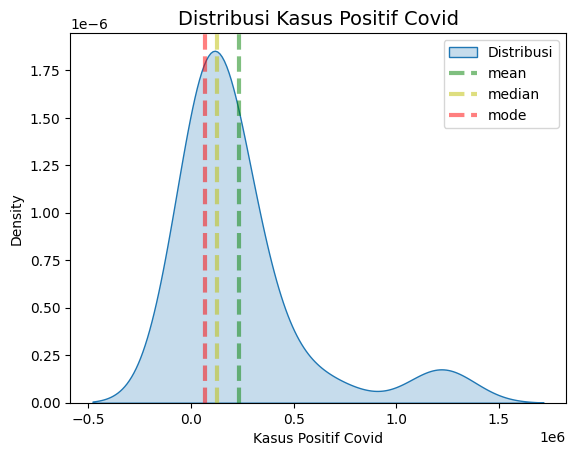

In [ ]:
print(data['Kasus Positif Covid'].describe())
sns.kdeplot(data=data, x="Kasus Positif Covid", fill = True)
plt.axvline(x=data['Kasus Positif Covid'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Kasus Positif Covid'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Kasus Positif Covid']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Kasus Positif Covid")
plt.ylabel("Density")
plt.title("Distribusi Kasus Positif Covid", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Kasus Positif Covid'>

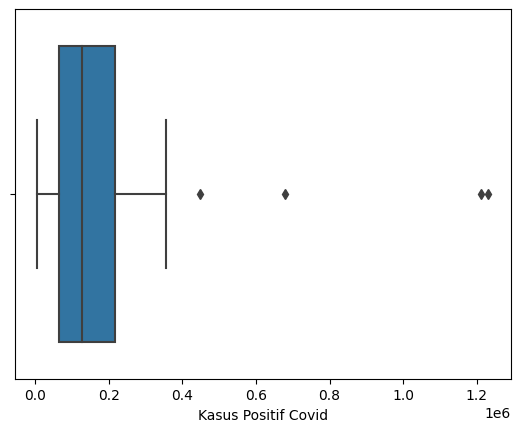

In [ ]:
sns.boxplot(x=data["Kasus Positif Covid"])

count    28.000000
mean      1.964643
std       1.235330
min      -0.100000
25%       1.120000
50%       1.605000
75%       3.170000
max       3.850000
Name: Inflasi, dtype: float64


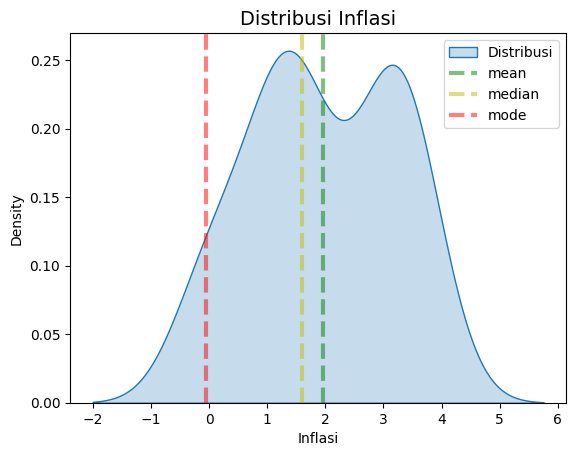

In [ ]:
print(data['Inflasi'].describe())
sns.kdeplot(data=data, x="Inflasi", fill = True)
plt.axvline(x=data['Inflasi'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Inflasi'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Inflasi']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Inflasi")
plt.ylabel("Density")
plt.title("Distribusi Inflasi", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Inflasi'>

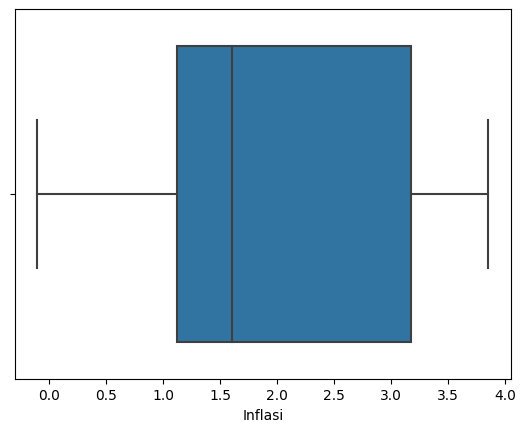

In [ ]:
sns.boxplot(x=data["Inflasi"])

count    28.000000
mean     -1.943716
std      13.688839
min     -24.322581
25%     -15.010484
50%       0.977381
75%      10.325806
max      18.645161
Name: Perubahan Persentase Mobilitas di Rekreasi dan Retail, dtype: float64


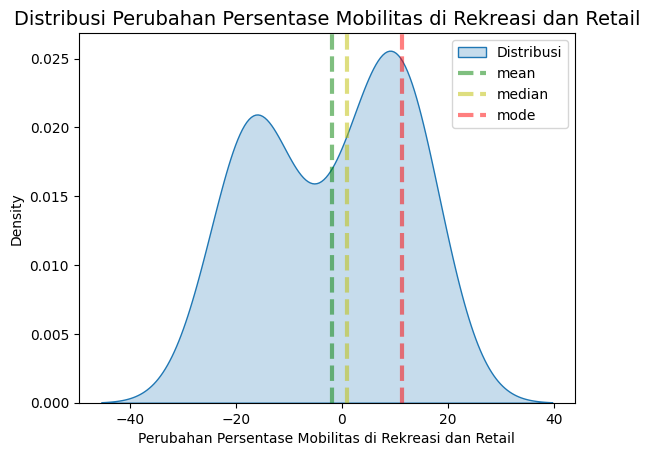

In [ ]:
print(data['Perubahan Persentase Mobilitas di Rekreasi dan Retail'].describe())
sns.kdeplot(data=data, x="Perubahan Persentase Mobilitas di Rekreasi dan Retail", fill = True)
plt.axvline(x=data['Perubahan Persentase Mobilitas di Rekreasi dan Retail'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Perubahan Persentase Mobilitas di Rekreasi dan Retail'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Perubahan Persentase Mobilitas di Rekreasi dan Retail']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Perubahan Persentase Mobilitas di Rekreasi dan Retail")
plt.ylabel("Density")
plt.title("Distribusi Perubahan Persentase Mobilitas di Rekreasi dan Retail", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Perubahan Persentase Mobilitas di Rekreasi dan Retail'>

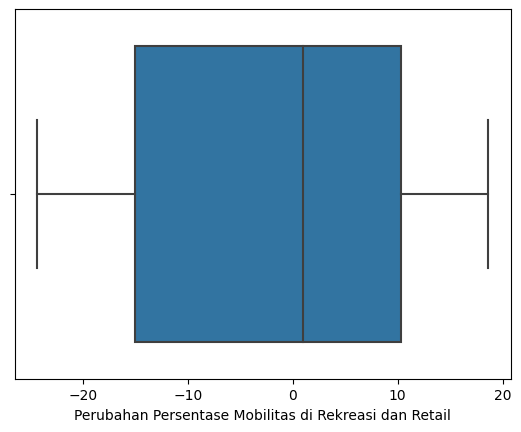

In [ ]:
sns.boxplot(x=data["Perubahan Persentase Mobilitas di Rekreasi dan Retail"])

count    28.000000
mean     18.623228
std      14.633296
min      -8.612903
25%       3.774194
50%      24.035484
75%      30.533333
max      39.645161
Name: Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek, dtype: float64


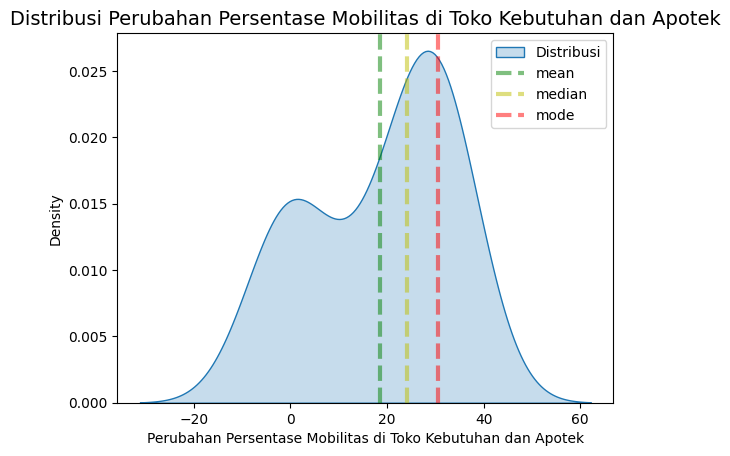

In [ ]:
print(data['Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek'].describe())
sns.kdeplot(data=data, x="Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek", fill = True)
plt.axvline(x=data['Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek")
plt.ylabel("Density")
plt.title("Distribusi Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek'>

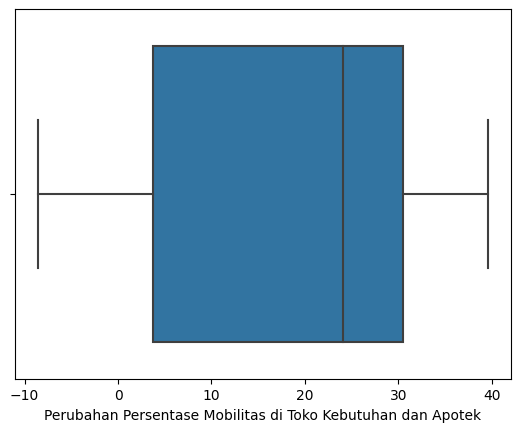

In [ ]:
sns.boxplot(x=data["Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek"])

count    28.000000
mean      9.859853
std      27.496832
min     -24.964286
25%     -10.941667
50%       0.903226
75%      35.702688
max      76.967742
Name: Perubahan Persentase Mobilitas Masyarakat di Taman, dtype: float64


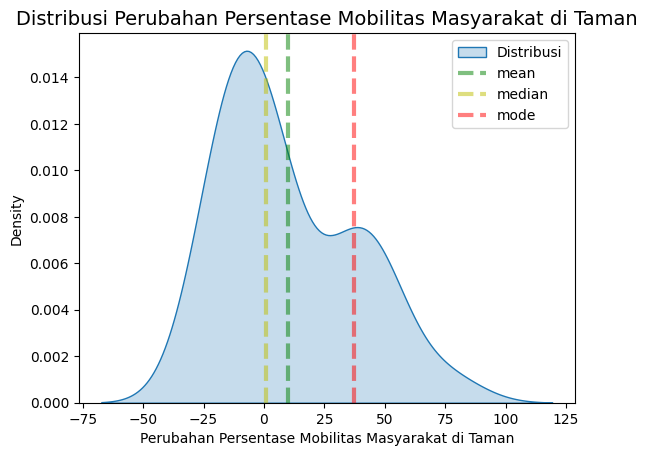

In [ ]:
print(data['Perubahan Persentase Mobilitas Masyarakat di Taman'].describe())
sns.kdeplot(data=data, x="Perubahan Persentase Mobilitas Masyarakat di Taman", fill = True)
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Taman'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Taman'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Perubahan Persentase Mobilitas Masyarakat di Taman']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Perubahan Persentase Mobilitas Masyarakat di Taman")
plt.ylabel("Density")
plt.title("Distribusi Perubahan Persentase Mobilitas Masyarakat di Taman", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Perubahan Persentase Mobilitas Masyarakat di Taman'>

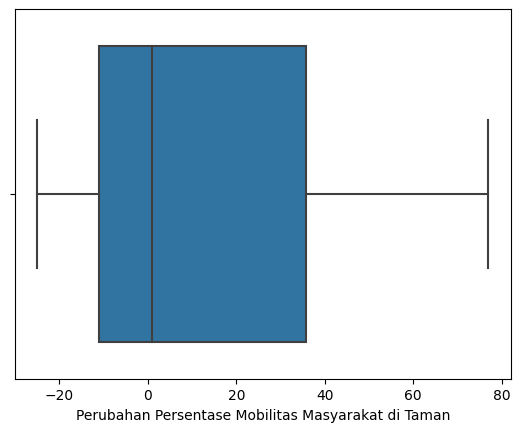

In [ ]:
sns.boxplot(x=data["Perubahan Persentase Mobilitas Masyarakat di Taman"])

count    28.000000
mean    -21.062582
std      12.399537
min     -45.258065
25%     -30.653226
50%     -23.355952
75%      -9.650269
max      -0.709677
Name: Perubahan Persentase Mobilitas Masyarakat di Stasiun, dtype: float64


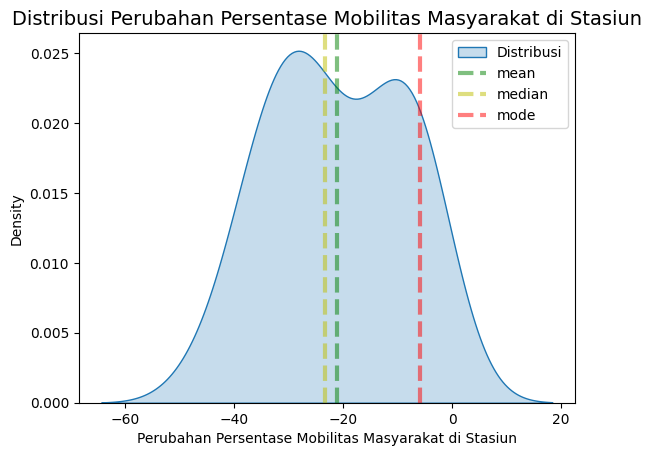

In [ ]:
print(data['Perubahan Persentase Mobilitas Masyarakat di Stasiun'].describe())
sns.kdeplot(data=data, x="Perubahan Persentase Mobilitas Masyarakat di Stasiun", fill = True)
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Stasiun'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Stasiun'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Perubahan Persentase Mobilitas Masyarakat di Stasiun']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Perubahan Persentase Mobilitas Masyarakat di Stasiun")
plt.ylabel("Density")
plt.title("Distribusi Perubahan Persentase Mobilitas Masyarakat di Stasiun", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Perubahan Persentase Mobilitas Masyarakat di Stasiun'>

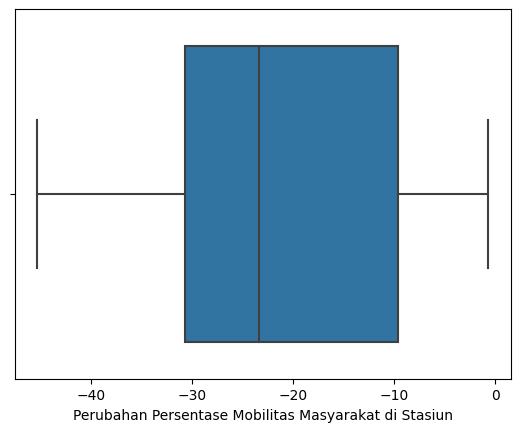

In [ ]:
sns.boxplot(x=data["Perubahan Persentase Mobilitas Masyarakat di Stasiun"])

count    28.000000
mean    -10.038101
std      15.766596
min     -28.935484
25%     -23.075000
50%     -14.111290
75%       5.425000
max      18.766667
Name: Perubahan Persentase Mobilitas Masyarakat di Kantor, dtype: float64


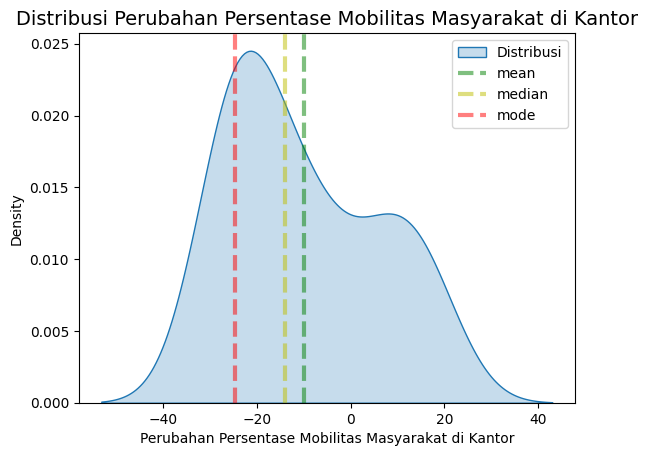

In [ ]:
print(data['Perubahan Persentase Mobilitas Masyarakat di Kantor'].describe())
sns.kdeplot(data=data, x="Perubahan Persentase Mobilitas Masyarakat di Kantor", fill = True)
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Kantor'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Kantor'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Perubahan Persentase Mobilitas Masyarakat di Kantor']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Perubahan Persentase Mobilitas Masyarakat di Kantor")
plt.ylabel("Density")
plt.title("Distribusi Perubahan Persentase Mobilitas Masyarakat di Kantor", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Perubahan Persentase Mobilitas Masyarakat di Kantor'>

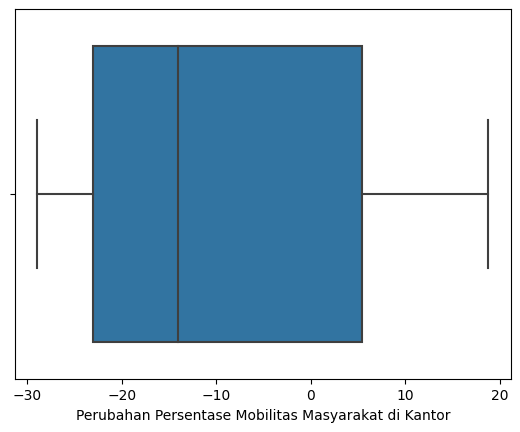

In [ ]:
sns.boxplot(x=data["Perubahan Persentase Mobilitas Masyarakat di Kantor"])

count    28.000000
mean     10.043683
std       3.786173
min       4.580645
25%       6.583333
50%       9.854839
75%      13.533333
max      16.933333
Name: Perubahan Persentase Mobilitas Masyarakat di Residential Area, dtype: float64


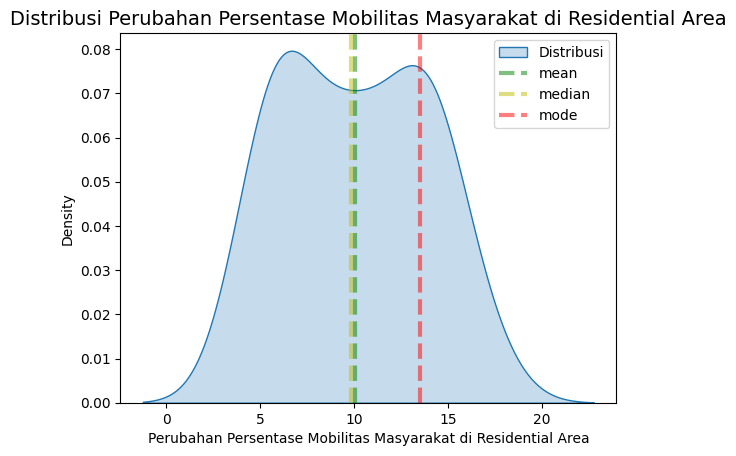

In [ ]:
print(data['Perubahan Persentase Mobilitas Masyarakat di Residential Area'].describe())
sns.kdeplot(data=data, x="Perubahan Persentase Mobilitas Masyarakat di Residential Area", fill = True)
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Residential Area'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Perubahan Persentase Mobilitas Masyarakat di Residential Area'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Perubahan Persentase Mobilitas Masyarakat di Residential Area']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Perubahan Persentase Mobilitas Masyarakat di Residential Area")
plt.ylabel("Density")
plt.title("Distribusi Perubahan Persentase Mobilitas Masyarakat di Residential Area", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Perubahan Persentase Mobilitas Masyarakat di Residential Area'>

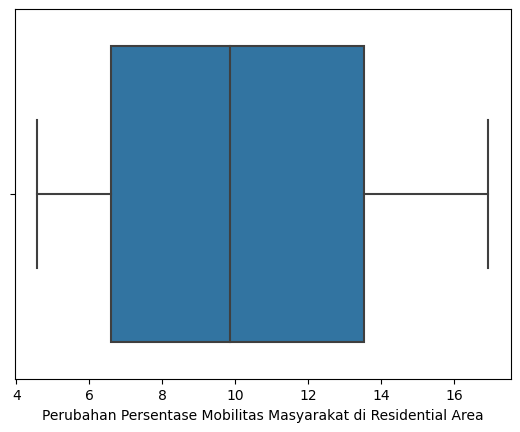

In [ ]:
sns.boxplot(x=data["Perubahan Persentase Mobilitas Masyarakat di Residential Area"])

count    28.000000
mean      3.479464
std       1.686520
min       0.963000
25%       2.239750
50%       3.208000
75%       4.828750
max       7.565000
Name: Data Neraca Perdagangan, dtype: float64


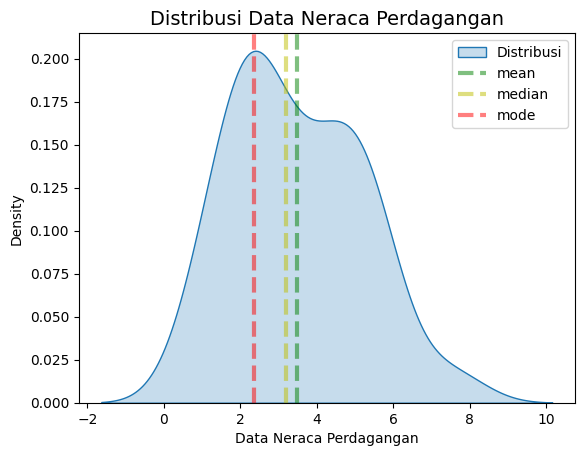

In [ ]:
print(data['Data Neraca Perdagangan'].describe())
sns.kdeplot(data=data, x="Data Neraca Perdagangan", fill = True)
plt.axvline(x=data['Data Neraca Perdagangan'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Data Neraca Perdagangan'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Data Neraca Perdagangan']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Data Neraca Perdagangan")
plt.ylabel("Density")
plt.title("Distribusi Data Neraca Perdagangan", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Data Neraca Perdagangan'>

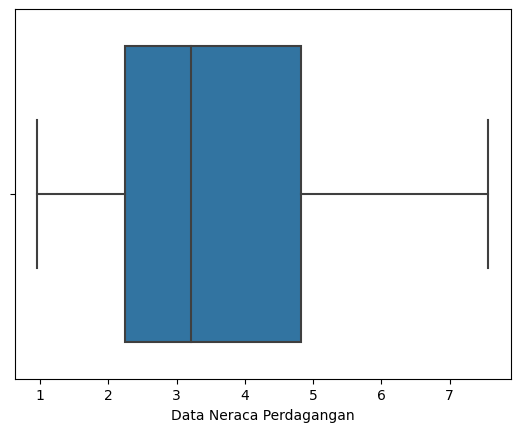

In [ ]:
sns.boxplot(x=data["Data Neraca Perdagangan"])

count     28.000000
mean     107.960357
std        2.633074
min      104.850000
25%      106.127500
50%      106.645000
75%      110.090000
max      112.870000
Name: Data Index Harga Konsumen, dtype: float64


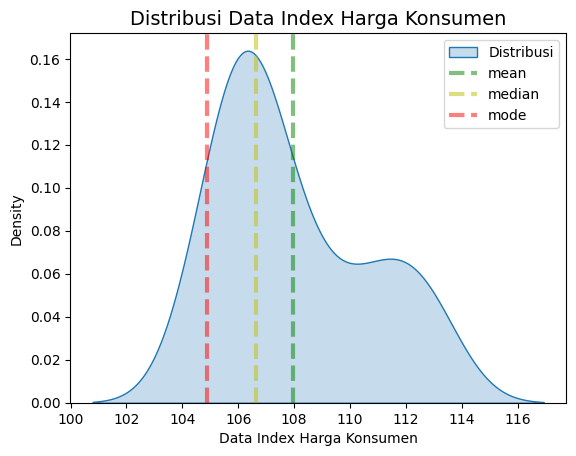

In [ ]:
print(data['Data Index Harga Konsumen'].describe())
sns.kdeplot(data=data, x="Data Index Harga Konsumen", fill = True)
plt.axvline(x=data['Data Index Harga Konsumen'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, linestyle='dashed')
plt.axvline(x=data['Data Index Harga Konsumen'].median(), linewidth=3, color='y', label="median", alpha=0.5,linestyle='dashed')
plt.axvline(x=statistics.mode(data['Data Index Harga Konsumen']), linewidth=3, color='r', label="median", alpha=0.5,linestyle='dashed')

# set title, legends and labels
plt.xlabel("Data Index Harga Konsumen")
plt.ylabel("Density")
plt.title("Distribusi Data Index Harga Konsumen", size=14)
plt.legend(['Distribusi',"mean", "median",'mode'])

<Axes: xlabel='Data Index Harga Konsumen'>

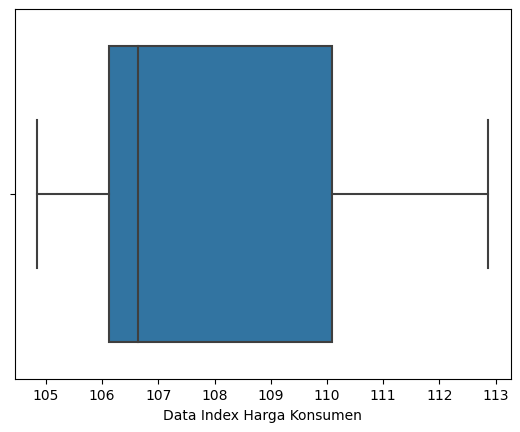

In [ ]:
sns.boxplot(x=data["Data Index Harga Konsumen"])

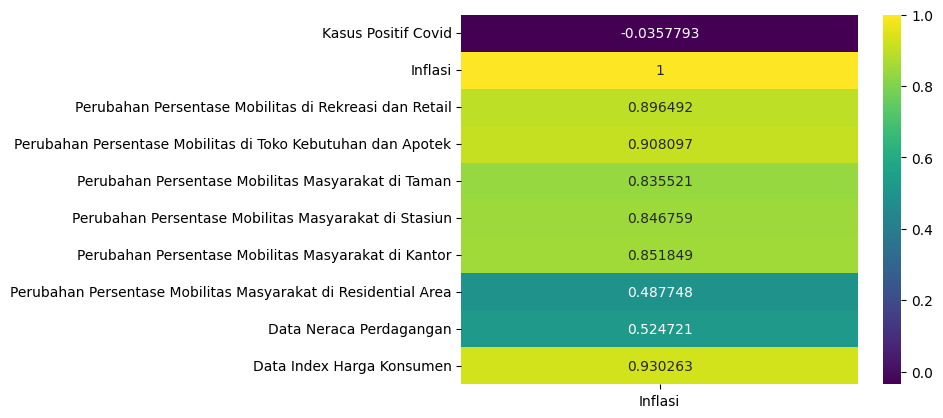

In [ ]:
data_korelasi = data[data.columns[1:]].corr()['Inflasi']
data_korelasi = pd.DataFrame(data_korelasi)
sns.heatmap(data_korelasi, annot=True, fmt="g", cmap='viridis')

plt.show()

jadi dapat kita lihat bahwa data ihk, perubahan persentase mobilitas di rekreasi dan retail, perubahan persentase mobilitas di toko kebutuhan dan apotek berkorelasi kuat terhadap Inflasi



---------------------------------------------------------------------
**FEATURE SCALING**
dilakukan feature scaling karena perubahan persentase itu dalam persentase sementara data Neraca perdagangan itu dalam Milyar rupiah, atau secara singkat, memiliki satuan dasar yang berbeda

In [ ]:
#Scaling data

columns = ['Kasus Positif Covid','Inflasi', 'Data Neraca Perdagangan', 'Data Index Harga Konsumen',
           'Perubahan Persentase Mobilitas di Rekreasi dan Retail', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
           'Perubahan Persentase Mobilitas Masyarakat di Taman', 'Perubahan Persentase Mobilitas Masyarakat di Stasiun',
           'Perubahan Persentase Mobilitas Masyarakat di Kantor', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area',]
bulan = pd.DataFrame(data['Bulan'])
#Standard scaler
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(data.drop(columns = ['Bulan']))
standard = pd.DataFrame(standard, columns = columns)

data_standard = bulan.join(standard)


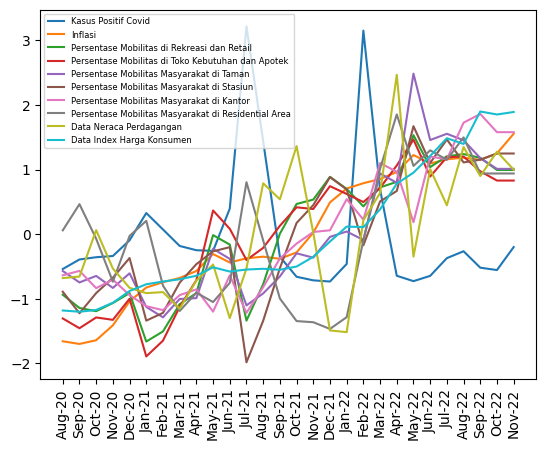


standard deviasinya: 
Kasus Positif Covid                                              1.01835
Inflasi                                                          1.01835
Data Neraca Perdagangan                                          1.01835
Data Index Harga Konsumen                                        1.01835
Perubahan Persentase Mobilitas di Rekreasi dan Retail            1.01835
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek      1.01835
Perubahan Persentase Mobilitas Masyarakat di Taman               1.01835
Perubahan Persentase Mobilitas Masyarakat di Stasiun             1.01835
Perubahan Persentase Mobilitas Masyarakat di Kantor              1.01835
Perubahan Persentase Mobilitas Masyarakat di Residential Area    1.01835
dtype: float64


In [ ]:
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 1], label = 'Kasus Positif Covid')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 2], label = 'Inflasi')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 3], label = 'Persentase Mobilitas di Rekreasi dan Retail')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 4], label = 'Persentase Mobilitas di Toko Kebutuhan dan Apotek')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 5], label = 'Persentase Mobilitas Masyarakat di Taman')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 6], label = 'Persentase Mobilitas Masyarakat di Stasiun')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 7], label = 'Persentase Mobilitas Masyarakat di Kantor')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 8], label = 'Persentase Mobilitas Masyarakat di Residential Area')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 9], label = 'Data Neraca Perdagangan')
plt.plot(data_standard['Bulan'], data_standard.iloc[:, 10], label = 'Data Index Harga Konsumen')

plt.legend(prop = {'size' : 6})
plt.xticks(rotation = 'vertical')
plt.show()
print()
print('standard deviasinya: ')
print(data_standard.std())

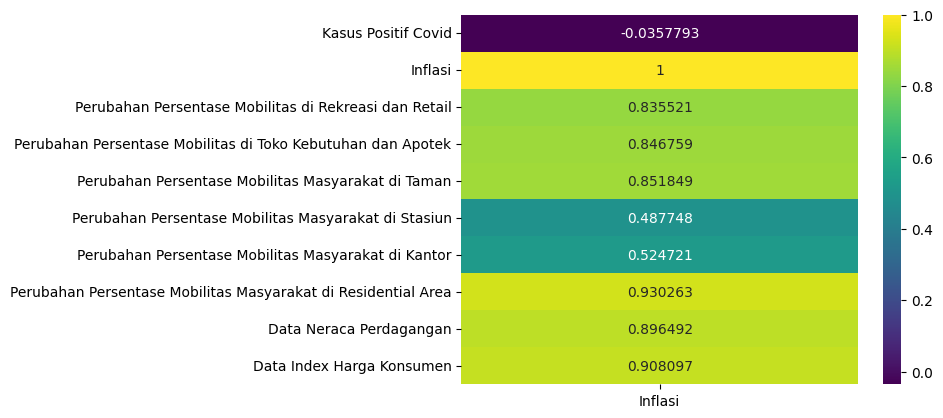

In [ ]:
data_korelasi = data_standard[data.columns[1:]].corr()['Inflasi']
data_korelasi = pd.DataFrame(data_korelasi)
sns.heatmap(data_korelasi, annot=True, fmt="g", cmap='viridis')

plt.show()

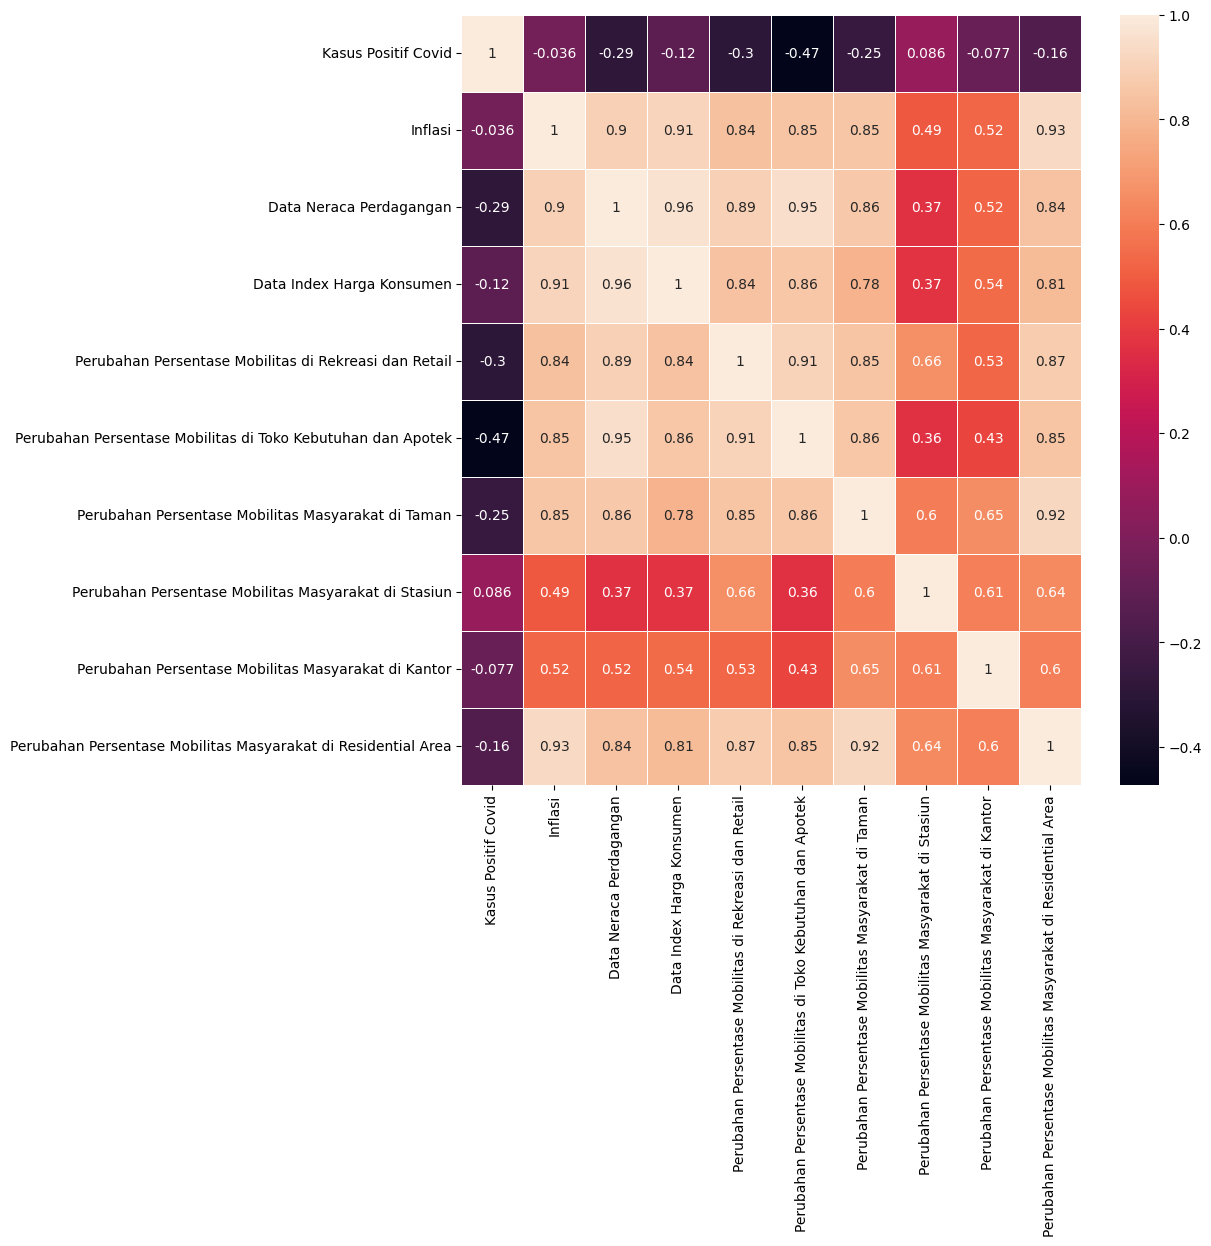

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_standard.corr(), annot=True,linewidths = .5, ax = ax)

plt.show()

jadi dapat kita lihat bahwa Data IHK, Data Neraca Perdagangan, perubahan persentase mobilitas masyarakat di residential area berkorelasi kuat terhadap Inflasi


-----------------------------------------------------------------------
##Feature engineering & modelling

In [ ]:
#multiple Linear Regression
y = data_standard.Inflasi
X = data_standard.drop(columns = ['Inflasi', 'Bulan'])

#Pake validation train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/5, random_state=0)

#Define model
multiple_linear_regressor = LinearRegression()
#Fit model
model = multiple_linear_regressor.fit(X_train, y_train)
prediksi_inflasi = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, prediksi_inflasi))
print("MSE: ", mean_squared_error(y_test, prediksi_inflasi))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediksi_inflasi)))
print("R Squared scores: ", model.score(X_train, y_train))
print()

hasil = pd.DataFrame(prediksi_inflasi)
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
hasil = y_test.join(hasil)
hasil = hasil.drop(columns = ['index'])
hasil.rename(columns = {0 : 'Prediksi'}, inplace = True)
hasil


MAE:  0.2618604996710057
MSE:  0.11489109430731353
RMSE: 0.3389558884387665
R Squared scores:  0.9748008296195679



,Inflasi,Prediksi
0,-1.644293,-1.305066
1,1.092564,0.919721
2,-0.284108,-0.105342
3,0.705118,0.413163
4,-0.828182,-1.372702
5,-0.374787,-0.379843
6,1.183243,1.166534
7,-0.383030,-0.441382
8,0.960668,0.218829
9,1.150269,1.486554


In [ ]:
scores_mae = -1 * cross_val_score(multiple_linear_regressor, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores : \n", scores_mae)
print("Average MAE Score (Across experminets): ")
print(scores_mae.mean())
print()
scores_r2 = cross_val_score(multiple_linear_regressor, X_train, y_train, scoring='r2', cv=5)
print("R squared scores: \n", scores_r2)
print("Average R squared score (Across experiments): ")
print(scores_r2.mean())

MAE scores : 
 [0.16412024 0.32584232 0.54755034 0.47609977 1.27355268]
Average MAE Score (Across experminets): 
0.5574330710230251

R squared scores: 
 [ 0.95464127  0.77033308 -0.16538134  0.80824102 -3.02719487]
Average R squared score (Across experiments): 
-0.13187217020555558


akan dilakukan feature selection menggunakan metode Backward Elimination untuk menyeleksi feature yang lebih berpengaruh terhadap model

In [ ]:
#Backward Elimination
X = np.append(arr=np.ones((28, 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Neraca Perdagangan', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas di Rekreasi dan Retail', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                              'Perubahan Persentase Mobilitas Masyarakat di Taman', 'Perubahan Persentase Mobilitas Masyarakat di Stasiun', 'Perubahan Persentase Mobilitas Masyarakat di Kantor', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
============================================================================================================
Model:                             OLS                            Adj. R-squared:                   0.941   
Dependent Variable:                Inflasi                        AIC:                              8.9824  
Date:                              2023-07-12 14:14               BIC:                              22.3044 
No. Observations:                  28                             Log-Likelihood:                   5.5088  
Df Model:                          9                              F-statistic:                      48.63   
Df Residuals:                      18                             Prob (F-statistic):               8.36e-11
R-squared:                         0.960                          Scale:                            0.061450
------------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                                      0.0000   0.0468  0.0000 1.0000 -0.0984 0.0984
Kasus Positif Covid                                            0.1914   0.0845  2.2644 0.0361  0.0138 0.3690
Data Neraca Perdagangan                                        0.3049   0.5817  0.5242 0.6065 -0.9172 1.5271
Data Index Harga Konsumen                                      0.1997   0.3291  0.6066 0.5517 -0.4918 0.8912
Perubahan Persentase Mobilitas di Rekreasi dan Retail         -0.2934   0.3001 -0.9774 0.3413 -0.9239 0.3372
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek    0.2980   0.3018  0.9874 0.3365 -0.3361 0.9322
Perubahan Persentase Mobilitas Masyarakat di Taman            -0.1753   0.2270 -0.7724 0.4499 -0.6521 0.3015
Perubahan Persentase Mobilitas Masyarakat di Stasiun           0.0529   0.1748  0.3026 0.7656 -0.3144 0.4202
Perubahan Persentase Mobilitas Masyarakat di Kantor           -0.0439   0.0834 -0.5268 0.6047 -0.2191 0.1313
Perubahan Persentase Mobilitas Masyarakat di Residential Area  0.7009   0.1776  3.9470 0.0009  0.3278 1.0739
------------------------------------------------------------------------------------------------------------
Omnibus:                             2.459                      Durbin-Watson:                         1.112
Prob(Omnibus):                       0.292                      Jarque-Bera (JB):                      1.707
Skew:                                0.400                      Prob(JB):                              0.426
Kurtosis:                            2.092                      Condition No.:                         38   
============================================================================================================

"""

In [ ]:
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,8,9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Neraca Perdagangan', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas di Rekreasi dan Retail', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                              'Perubahan Persentase Mobilitas Masyarakat di Taman', 'Perubahan Persentase Mobilitas Masyarakat di Kantor', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
============================================================================================================
Model:                             OLS                            Adj. R-squared:                   0.944   
Dependent Variable:                Inflasi                        AIC:                              7.1245  
Date:                              2023-07-12 14:14               BIC:                              19.1143 
No. Observations:                  28                             Log-Likelihood:                   5.4378  
Df Model:                          8                              F-statistic:                      57.44   
Df Residuals:                      19                             Prob (F-statistic):               1.10e-11
R-squared:                         0.960                          Scale:                            0.058512
------------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                                      0.0000   0.0457  0.0000 1.0000 -0.0957 0.0957
Kasus Positif Covid                                            0.1957   0.0813  2.4069 0.0264  0.0255 0.3659
Data Neraca Perdagangan                                        0.2029   0.4625  0.4386 0.6659 -0.7651 1.1709
Data Index Harga Konsumen                                      0.2331   0.3026  0.7703 0.4506 -0.4002 0.8664
Perubahan Persentase Mobilitas di Rekreasi dan Retail         -0.2116   0.1274 -1.6601 0.1133 -0.4783 0.0552
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek    0.2790   0.2881  0.9685 0.3450 -0.3239 0.8819
Perubahan Persentase Mobilitas Masyarakat di Taman            -0.1359   0.1813 -0.7493 0.4629 -0.5154 0.2437
Perubahan Persentase Mobilitas Masyarakat di Kantor           -0.0341   0.0750 -0.4551 0.6542 -0.1910 0.1228
Perubahan Persentase Mobilitas Masyarakat di Residential Area  0.6966   0.1727  4.0330 0.0007  0.3351 1.0581
------------------------------------------------------------------------------------------------------------
Omnibus:                             2.203                      Durbin-Watson:                         1.079
Prob(Omnibus):                       0.332                      Jarque-Bera (JB):                      1.663
Skew:                                0.419                      Prob(JB):                              0.435
Kurtosis:                            2.149                      Condition No.:                         31   
============================================================================================================

"""

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5, 6, 8, 9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas di Rekreasi dan Retail', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                              'Perubahan Persentase Mobilitas Masyarakat di Taman', 'Perubahan Persentase Mobilitas Masyarakat di Kantor', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
============================================================================================================
Model:                             OLS                            Adj. R-squared:                   0.946   
Dependent Variable:                Inflasi                        AIC:                              5.4066  
Date:                              2023-07-12 14:14               BIC:                              16.0642 
No. Observations:                  28                             Log-Likelihood:                   5.2967  
Df Model:                          7                              F-statistic:                      68.38   
Df Residuals:                      20                             Prob (F-statistic):               1.39e-12
R-squared:                         0.960                          Scale:                            0.056149
------------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                                      0.0000   0.0448  0.0000 1.0000 -0.0934 0.0934
Kasus Positif Covid                                            0.1954   0.0796  2.4533 0.0235  0.0293 0.3616
Data Index Harga Konsumen                                      0.3524   0.1296  2.7205 0.0132  0.0822 0.6227
Perubahan Persentase Mobilitas di Rekreasi dan Retail         -0.2041   0.1237 -1.6498 0.1146 -0.4623 0.0540
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek    0.3578   0.2206  1.6220 0.1205 -0.1023 0.8179
Perubahan Persentase Mobilitas Masyarakat di Taman            -0.0873   0.1407 -0.6206 0.5419 -0.3808 0.2062
Perubahan Persentase Mobilitas Masyarakat di Kantor           -0.0362   0.0733 -0.4933 0.6272 -0.1891 0.1167
Perubahan Persentase Mobilitas Masyarakat di Residential Area  0.6534   0.1390  4.7008 0.0001  0.3634 0.9433
------------------------------------------------------------------------------------------------------------
Omnibus:                             2.098                      Durbin-Watson:                         1.047
Prob(Omnibus):                       0.350                      Jarque-Bera (JB):                      1.547
Skew:                                0.380                      Prob(JB):                              0.461
Kurtosis:                            2.135                      Condition No.:                         13   
============================================================================================================

"""

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5, 6, 9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas di Rekreasi dan Retail', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                              'Perubahan Persentase Mobilitas Masyarakat di Taman', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
============================================================================================================
Model:                             OLS                            Adj. R-squared:                   0.948   
Dependent Variable:                Inflasi                        AIC:                              3.7452  
Date:                              2023-07-12 14:14               BIC:                              13.0706 
No. Observations:                  28                             Log-Likelihood:                   5.1274  
Df Model:                          6                              F-statistic:                      82.72   
Df Residuals:                      21                             Prob (F-statistic):               1.63e-13
R-squared:                         0.959                          Scale:                            0.054126
------------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                                      0.0000   0.0440  0.0000 1.0000 -0.0914 0.0914
Kasus Positif Covid                                            0.2115   0.0714  2.9630 0.0074  0.0630 0.3599
Data Index Harga Konsumen                                      0.3222   0.1121  2.8753 0.0091  0.0892 0.5552
Perubahan Persentase Mobilitas di Rekreasi dan Retail         -0.2152   0.1195 -1.8006 0.0861 -0.4637 0.0333
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek    0.4211   0.1761  2.3904 0.0263  0.0548 0.7874
Perubahan Persentase Mobilitas Masyarakat di Taman            -0.1201   0.1218 -0.9861 0.3353 -0.3733 0.1332
Perubahan Persentase Mobilitas Masyarakat di Residential Area  0.6449   0.1354  4.7623 0.0001  0.3633 0.9264
------------------------------------------------------------------------------------------------------------
Omnibus:                             2.561                      Durbin-Watson:                         1.127
Prob(Omnibus):                       0.278                      Jarque-Bera (JB):                      1.791
Skew:                                0.423                      Prob(JB):                              0.408
Kurtosis:                            2.094                      Condition No.:                         10   
============================================================================================================

"""

In [ ]:
X_opt = X[:, [0, 1, 3, 4, 5, 9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas di Rekreasi dan Retail', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                              'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
============================================================================================================
Model:                             OLS                            Adj. R-squared:                   0.948   
Dependent Variable:                Inflasi                        AIC:                              3.0125  
Date:                              2023-07-12 14:14               BIC:                              11.0058 
No. Observations:                  28                             Log-Likelihood:                   4.4937  
Df Model:                          5                              F-statistic:                      99.19   
Df Residuals:                      22                             Prob (F-statistic):               2.47e-14
R-squared:                         0.958                          Scale:                            0.054058
------------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                                      0.0000   0.0439  0.0000 1.0000 -0.0911 0.0911
Kasus Positif Covid                                            0.2127   0.0713  2.9833 0.0069  0.0649 0.3606
Data Index Harga Konsumen                                      0.3258   0.1119  2.9107 0.0081  0.0937 0.5579
Perubahan Persentase Mobilitas di Rekreasi dan Retail         -0.2125   0.1194 -1.7796 0.0890 -0.4601 0.0351
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek    0.3862   0.1725  2.2395 0.0356  0.0286 0.7439
Perubahan Persentase Mobilitas Masyarakat di Residential Area  0.5587   0.1034  5.4033 0.0000  0.3443 0.7732
------------------------------------------------------------------------------------------------------------
Omnibus:                             2.323                      Durbin-Watson:                         0.960
Prob(Omnibus):                       0.313                      Jarque-Bera (JB):                      1.660
Skew:                                0.398                      Prob(JB):                              0.436
Kurtosis:                            2.112                      Condition No.:                         9    
============================================================================================================

"""

In [ ]:
X_opt = X[:, [0, 1, 3, 5, 9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek',
                              'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                             OLS                           Adj. R-squared:                  0.943   
Dependent Variable:                Inflasi                       AIC:                             4.7781  
Date:                              2023-07-12 14:14              BIC:                             11.4392 
No. Observations:                  28                            Log-Likelihood:                  2.6109  
Df Model:                          4                             F-statistic:                     112.6   
Df Residuals:                      23                            Prob (F-statistic):              9.38e-15
R-squared:                         0.951                         Scale:                           0.059151
----------------------------------------------------------------------------------------------------------
                                                              Coef.  Std.Err.   t    P>|t|   [0.025 0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                                     0.0000   0.0460 0.0000 1.0000 -0.0951 0.0951
Kasus Positif Covid                                           0.2058   0.0745 2.7627 0.0111  0.0517 0.3599
Data Index Harga Konsumen                                     0.3062   0.1165 2.6280 0.0150  0.0652 0.5472
Perubahan Persentase Mobilitas di Toko Kebutuhan dan Apotek   0.2656   0.1659 1.6012 0.1230 -0.0775 0.6088
Perubahan Persentase Mobilitas Masyarakat di Residential Area 0.4900   0.1003 4.8835 0.0001  0.2824 0.6975
----------------------------------------------------------------------------------------------------------
Omnibus:                             1.458                     Durbin-Watson:                        0.784
Prob(Omnibus):                       0.482                     Jarque-Bera (JB):                     1.150
Skew:                                0.276                     Prob(JB):                             0.563
Kurtosis:                            2.175                     Condition No.:                        7    
==========================================================================================================

"""

In [ ]:
X_opt = X[:, [0, 1, 3, 9]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# Step 3 - analysing & fetching the predictor with value more than 0.05
regressor_OLS.summary2(xname=['Intercept','Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area'])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
==========================================================================================================
Model:                             OLS                           Adj. R-squared:                  0.939   
Dependent Variable:                Inflasi                       AIC:                             5.7373  
Date:                              2023-07-12 14:14              BIC:                             11.0661 
No. Observations:                  28                            Log-Likelihood:                  1.1313  
Df Model:                          3                             F-statistic:                     140.1   
Df Residuals:                      24                            Prob (F-statistic):              2.42e-15
R-squared:                         0.946                         Scale:                           0.063005
----------------------------------------------------------------------------------------------------------
                                                              Coef.  Std.Err.   t    P>|t|   [0.025 0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                                     0.0000   0.0474 0.0000 1.0000 -0.0979 0.0979
Kasus Positif Covid                                           0.1127   0.0481 2.3441 0.0277  0.0135 0.2120
Data Index Harga Konsumen                                     0.4435   0.0814 5.4500 0.0000  0.2756 0.6115
Perubahan Persentase Mobilitas Masyarakat di Residential Area 0.5883   0.0819 7.1826 0.0000  0.4192 0.7573
----------------------------------------------------------------------------------------------------------
Omnibus:                             2.627                     Durbin-Watson:                        0.554
Prob(Omnibus):                       0.269                     Jarque-Bera (JB):                     1.580
Skew:                                0.316                     Prob(JB):                             0.454
Kurtosis:                            2.023                     Condition No.:                        3    
==========================================================================================================

"""



*   R square score 0.946 berarti 94.6% dari dependent variable dapat dijelaskan dengan independent variable yang kami pilih.
*   Karena f_pvalue kami (	Prob (F-statistic):	2.42e-15) lebih rendah dari 0.05, maka dapat disimpulkan bahwa model kami lebih baik daripada model lain yang lebih sederhana.

*  semua independent variable kami, 'Kasus positif covid', 'data indeks harga konsumen', 'persentase mobilitas masyarakat di residential area', memiliki p-value kurang dari 0.05 yang mana menunjukkan bahwa terdapat bukti yang cukup untuk 'Kasus positif covid', 'data indeks harga konsumen', 'persentase mobilitas masyarakat di residential area' affects 'Inflasi'.



In [ ]:
y = data_standard.Inflasi
X = data_standard[['Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/5, random_state=0)

#Define model
multiple_linear_regressor = LinearRegression()
#Fit model
model = multiple_linear_regressor.fit(X_train, y_train)
prediksi_inflasi = model.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, prediksi_inflasi))
print("MSE: ", mean_squared_error(y_test, prediksi_inflasi))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediksi_inflasi)))
print("R Squared scores: ", model.score(X_train, y_train))
print()

hasil = pd.DataFrame(prediksi_inflasi)
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
hasil = y_test.join(hasil)
hasil = hasil.drop(columns = ['index'])
hasil.rename(columns = {0 : 'Prediksi'}, inplace = True)
hasil

MAE:  0.2514643490426728
MSE:  0.08757232148245976
RMSE: 0.29592620952267773
R Squared scores:  0.9633581278774068



,Inflasi,Prediksi
0,-1.644293,-1.297454
1,1.092564,1.020674
2,-0.284108,-0.275465
3,0.705118,0.236725
4,-0.828182,-1.150478
5,-0.374787,0.020928
6,1.183243,1.318087
7,-0.383030,-0.364060
8,0.960668,0.804627
9,1.150269,1.520248


In [ ]:
hasil['Residual'] = regressor_OLS.resid
hasil.head()

,Inflasi,Prediksi,Residual
0,-1.644293,-1.297454,-0.323666
1,1.092564,1.020674,-0.303121
2,-0.284108,-0.275465,-0.339309
3,0.705118,0.236725,-0.160153
4,-0.828182,-1.150478,-0.068438


In [ ]:
scores = -1 * cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores : \n", scores)
print("Average MAE Score (Across experminets): ")
print(scores.mean())
print()
scores_r2 = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
print("R squared scores: \n", scores_r2)
print("Average R squared score (Across experiments): ")
print(scores_r2.mean())


MAE scores : 
 [0.17789709 0.19990428 0.18713513 0.33053271 0.33699331]
Average MAE Score (Across experminets): 
0.246492504787378

R squared scores: 
 [0.95812258 0.87518479 0.8998104  0.92659453 0.72917434]
Average R squared score (Across experiments): 
0.8777773261919519


Dapat dilihat juga, Mae, MSE, RMSE, dan skor cross-validation MAE, setelah dilakukan BE, menurun, sedangkan  r-square dan skor CV r-square, setelah dilakukan BE, naik , maka model membaik setelah dilakukan feature selection BE

# Analisis Residual

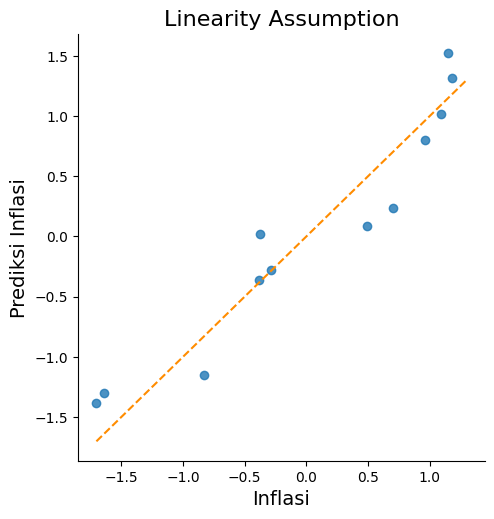

In [ ]:
sns.lmplot(x='Inflasi', y='Prediksi', data=hasil, fit_reg=False)


line_coords = np.arange(hasil[['Inflasi', 'Prediksi']].min().min(),
                        hasil[['Inflasi', 'Prediksi']].max().max())
plt.plot(line_coords, line_coords,
         color='darkorange', linestyle='--')

plt.ylabel('Prediksi Inflasi', fontsize=14)
plt.xlabel('Inflasi', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

Dari code diatas dapat dilihat bahwa titik titik residual berada disekitar garis diagonal dan terlihat linear dan searah dengan garis. Hal ini menunjukkan bahwa terdapat hubungan linear antara variable independen dengan variable dependen kami.

> Asumsi linearitas terpenuhi



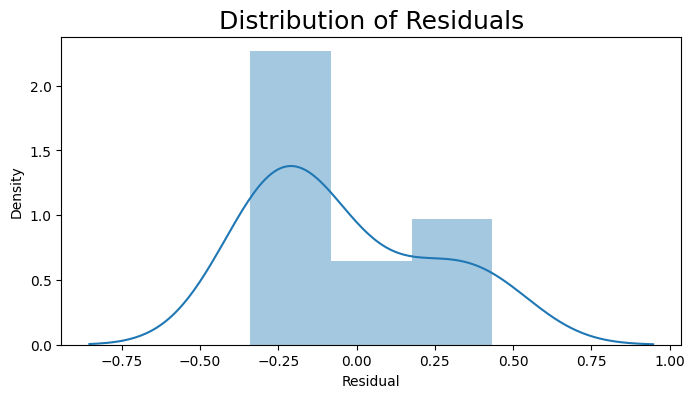

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.07330824549433944

Residuals are normally distributed


In [ ]:
from statsmodels.stats.diagnostic import normal_ad

plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(hasil['Residual'])
plt.show()


p_value = normal_ad(hasil['Residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)
print()

if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Dari code diatas dapat dilihat bahwa kami mendapatkan p-value = 0.073308 yang berarti residual berdistribusi normal (walaupun terlihat miring ke kiri, hal ini dikarenakan sampel yang cukup kecil yaitu 28).

> Asumsi normalitas terpenuhhi



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data_standard[['Kasus Positif Covid', 'Data Index Harga Konsumen', 'Perubahan Persentase Mobilitas Masyarakat di Residential Area']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                             feature       VIF
0                                Kasus Positif Covid  1.027842
1                          Data Index Harga Konsumen  2.943444
2  Perubahan Persentase Mobilitas Masyarakat di R...  2.981062


Dapat dilihat bahwa VIF semua prediktor < 5. Maka terbukti bahwa model tidak
memiliki multikolonieritas.

> Asumsi multikolinearitas terpenuhi



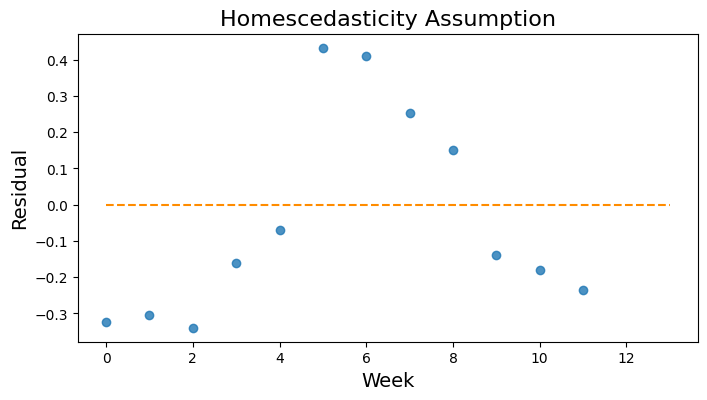

In [ ]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=hasil.index, y=hasil.Residual, alpha=0.8)
plt.plot(np.repeat(0, len(hasil.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()

Sebaran residualnya tidak membentuk pola tertentu (menyebar secara merata).


> Asumsi Homoskedastisitas terpenuhi




**Berdasarkan beberapa analisis residual diatas, dapat dibuktikan bahwa model yang kami ajukan memenuhi syarat persamaan regresi linear**

Berikut adalah visualisasi perbandingan antara data inflasi aktual dengan data inflasi yang telah kami prediksi

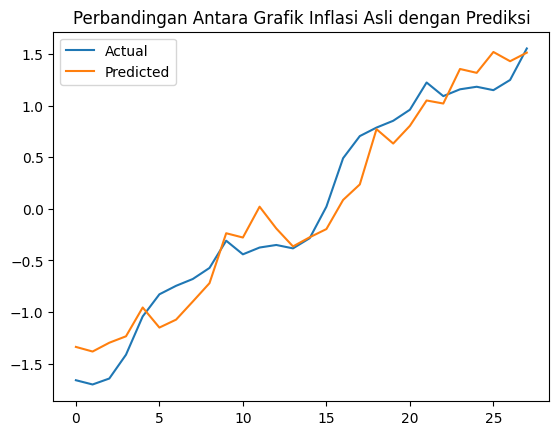

In [ ]:
from matplotlib import pyplot
actual = data_standard['Inflasi']
predicted = model.predict(X)

pyplot.plot(actual, label='Actual')
pyplot.plot(predicted, label='Predicted')
plt.title("Perbandingan Antara Grafik Inflasi Asli dengan Prediksi")
pyplot.legend()
pyplot.show()

Dengan grafik dapat dilihat bahwa telah terdapat kemiripan antara data inflasi aktual dengan data inflasi yang telah kami prediksi menggunakan model regresi linear kami

# Kesimpulan

> **Model kami memenuhi semua pengujian dalam langkah-langkah validasi model, sehingga kami dapat menyimpulkan bahwa model kami dapat bekerja dengan baik untuk memprediksi Inflasi di masa mendatang dengan menggunakan tiga variabel independen 'kasus positif Covid', 'data indeks harga konsumen', 'persentase orang mobilitas di residential area'. Model kami menunjukkan skor r-kuadrat yang baik sebesar 0,946 berarti 94,6% dari variabel dependen kami dapat dijelaskan menggunakan variabel independen kami.**

